In [1]:
import argparse, os, sys
#sys.path.append("../")

from netCDF4 import Dataset, MFDataset
import pyfesom2 as pf
import numpy as np
#from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm

import cmocean

In [21]:

# expname='tran-38pma1-v2-38k'
meshpath = '/home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/'
datapath='/home/a/a270075/ba0989/awiesm2.5/experiments-3/21k/outdata/fesom/'

ystart = 2000
yend = 2020
kwargs = {'use_cftime': 'True', 'naming_convention' : "custom", 'naming_template':"{}.{}.{}01.01.nc"}



lon_start = -20 #-180
lon_end = -20  #-160

lat_start = -90  #-90
lat_end = 90  #90


#######################
npoints   = 1000
years = np.arange(ystart,yend+1)
print("..... use years:")
print(years)

mesh = pf.load_mesh(meshpath, abg=[0,0,0], usepickle=False)
print(mesh)

#########  read data 
data_temp = pf.get_data(datapath, 'temp', years, mesh , **kwargs )
data_salt = pf.get_data(datapath, 'salt', years, mesh , **kwargs )
print(data_temp.shape)

lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)
dist, transect_data_temp = pf.get_transect(data_temp, mesh, lonlat)
dist2, transect_data_salt = pf.get_transect(data_salt, mesh, lonlat)

lons = lonlat[0, :]
lats = lonlat[1, :]


..... use years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
Load 2d part of the mesh in 0 second(s)

FESOM mesh:
path                  = /home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed
alpha, beta, gamma    = 0, 0, 0
number of 2d nodes    = 95239
number of 2d elements = 185893

        
Depth is None, 3d field will be returned
Depth is None, 3d field will be returned
(95239, 47)


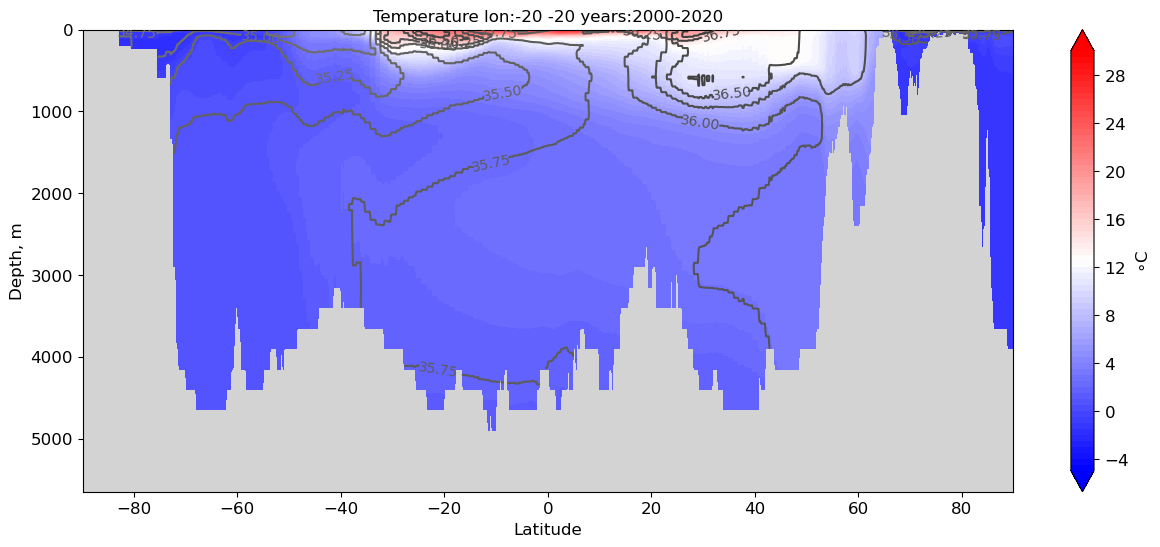

In [22]:


####### plot settings 
maxdepth = 6000
title='Temperature'+" lon:"+str(lon_start)+" "+str(lon_end)+" years:"+str(ystart)+'-'+str(yend)
colormap = plt.cm.bwr  #cmocean.cm.thermal
levels=np.linspace(-5,30, 71)

#######  data 
data = transect_data_temp
data2 = transect_data_salt 
xvals = lats 

depth_index = pf.ind_for_depth(maxdepth, mesh)
# hope it will not slow things down
data_levels = pf.get_plot_levels(levels, data[:, :depth_index].T, lev_to_data=False)
yvals = np.abs(mesh.zlev[:depth_index])

############ plotting 
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1,1)

image = ax.contourf( xvals, yvals, data[:, :depth_index].T, levels=data_levels, cmap=colormap, extend="both", )
ax.invert_yaxis()
ax.set_title(title, size=12)
ax.set_xlabel('Latitude', size=12)
ax.set_ylabel("Depth, m", size=12)
ax.set_facecolor("lightgray")
ax.tick_params(axis="both", which="major", labelsize=12)

image2 = ax.contour( xvals, yvals, data2[:, :depth_index].T, levels=np.arange(30,40, 0.25), cmap=cmocean.cm.gray_r, extend="neither", )
plt.clabel(image2, fontsize=10)


cb = plt.colorbar(image, format=pf.sfmt)
cb.set_label('$\circ$C', size=12)
cb.ax.tick_params(labelsize=12)
cb.ax.yaxis.get_offset_text().set_fontsize(12)


# figname = 'thermohaline_profile_38k.png'
# plt.savefig(figname)
# plt.show(block=False)
# plt.pause(3)